In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from references.colorization.colorizers import *

# load colorizers
colorizer_eccv16 = eccv16(pretrained=True).eval()
colorizer_siggraph17 = siggraph17(pretrained=True).eval()

from torchsummary import summary

summary(siggraph17(pretrained=True), (1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           2,368
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
       BatchNorm2d-5         [-1, 64, 256, 256]             128
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
      BatchNorm2d-10        [-1, 128, 128, 128]             256
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

In [3]:
from tqdm import tqdm
# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize

df_poke = pd.read_csv("data/pokemon.csv")
df_poke

IMAGE_DIR = "data/pokemon_png"

# loading training images
train_img = []
for pokemon_name in tqdm(df_poke['Name']):
    # defining the image path
    image_path = IMAGE_DIR + "/" + pokemon_name + ".png"
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
train_x.shape

100%|██████████| 809/809 [00:37<00:00, 21.61it/s]


(809, 224, 224, 3)

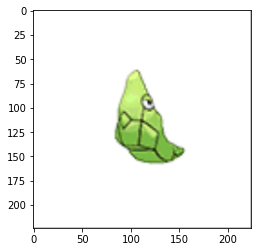

In [4]:
# Exploring the data
index = 10
plt.imshow(train_x[index])